https://github.com/ceshine/modern_chinese_nlp/tree/0.0.1/notebooks

In [1]:
!pip install fastai==1.0.52
from fastai.text import *

     |████████████████████████████████| 225kB 2.8MB/s 
  Found existing installation: fastai 1.0.55
    Uninstalling fastai-1.0.55:
      Successfully uninstalled fastai-1.0.55


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
path = Path(os.getcwd())
path = path/'gdrive'/'My Drive'
news=path/'Thesis Data'/'full doc csv'
aa=path/'Thesis Data'/'Our dataset'
aa2=path/'Thesis Data'/'AA dataset'
char=path/'Thesis Data'/'char-ulm'
wiki_data = path/'Thesis Data'/'wiki_data'/'Wiki'

In [0]:
def testing(dts):
  df = pd.read_csv(dts) 
  text_array = df["text"].tolist()
  print(len(text_array))

  final_preds = []

  for text in text_array:
      preds = learn_cls.predict(text)
      final_preds.append(str(preds[0]))

  targets = df["label"].tolist()

  err=[]
  count =0;
  tst = len(text_array)

  for i in range(tst):
      if(targets[i]==final_preds[i]):
          count = count+1
      else:
  #         print(targets[i] + ", " + final_preds[i] + ';')
          err.append((targets[i],final_preds[i]))
  print("Accuracy: ")
  print(count/tst)
  print(err)
  return final_preds,targets

### LM

In [0]:
bs = 32
bptt = 70
vocab = " !\"#$%&'()*+,-./0123456789:;=<>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[]^_`abcdefghijklmnopqrstuvwxyz{|}~¥§©±ঃঅআইঈউঊঋএঐওঔকখগঘঙচছজঝঞটঠডঢণতথদধনপফবভমযরলশষসহ়ািীুূৃেৈোৌ্ৎৗড়ঢ়য়০১২৩৪৫৬৭৮৯৷‘’‚“”‪™−√∝∞"

In [0]:
class NewTokenizer(BaseTokenizer):
    def tokenizer(self,t):
      return [BOS]+[i for i in t]

In [0]:
itos = [UNK, PAD, BOS, EOS, FLD, TK_REP, TK_WREP] + [i for i in vocab]

In [0]:
vocab=Vocab(itos)
tokenizer=Tokenizer(NewTokenizer, pre_rules=[], post_rules=[])

In [9]:
len(itos)

188

In [0]:
data_lm = TextLMDataBunch.from_csv(wiki_data , 'wiki_lm.csv', bs=bs , bptt=bptt,tokenizer=tokenizer, vocab=vocab)
data_lm.save('wiki_char.pkl')

In [0]:
data_lm = load_data(wiki_data, 'wiki_char.pkl', bs=bs)

In [0]:
data_lm.show_batch()

idx,text
0,় ী স র ক া র ি ক র ্ ম ক র ্ ত া র া দ া য ় ি ত ্ ব ব ি ভ া জ ন ে র ম া ধ ্ য ম ে স র ক া র ে র স ক ল ক র
1,স া ল ে ঢ া ক া য ় প ি ই এ ন ক ্ ল া ব ে র উ দ ্ য ো গ ে আ য ় ো জ ি ত আ ন ্ ত র ্ জ া ত ি ক স ম ্ ম ে ল ন ে
2,ে ব ে ব ি জ ্ ঞ া ন ী ম হ ল ে ন ি জ ে র অ ব স ্ থ া ন দ ৃ ঢ ় ক র ে ন ে য ় া স হ জ ছ ি ল ন া xxunk
3,ী ন র া শ ি র প র ি ম া প ে র জ ন ্ য ব ্ য ব হ ৃ ত ক য ় ে ক ট া ছ দ ্ ম এ ক ক xxunk ভ গ ্ ন া xxunk শ স র ্ ব
4,", B r i a n A . S p a r k e s , "" A n c i e n t G r e e c e a n d R o m e "" , p a g e 8 9 , T h e"


In [0]:
len(data_lm.train_dl.vocab.itos)

188

In [0]:
data_lm.train_dl.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',']

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained=False, drop_mult=0.5) #, callback_fns=ShowGraph

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


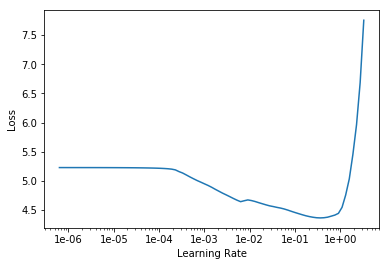

In [0]:
learn.lr_find()
learn.recorder.plot()

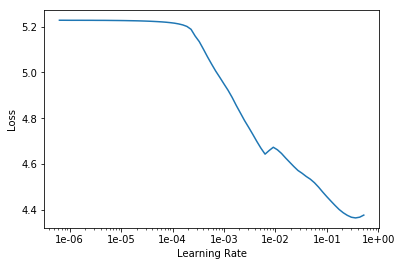

In [0]:
learn.recorder.plot(skip_end=15)

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_1');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_2');

epoch,train_loss,valid_loss,accuracy,time
0,1.327920,1.248497,0.639713,3:53:05


In [0]:
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_3');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_3')
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_4');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_4');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_5');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_5');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_6');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_6');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_7');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.216252,1.153591,0.664908,3:35:44


In [0]:
learn.load('wiki_char_7');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_8');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_8');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_9');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_9');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_10');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.145464,1.136147,0.669742,3:49:18


In [0]:
learn.load('wiki_char_10');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_11');

epoch,train_loss,valid_loss,accuracy,time
0,1.171790,1.132355,0.670582,3:50:32


In [0]:
learn.load('wiki_char_11');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_12');

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.

In [0]:
learn.load('wiki_char_12');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_13');

/usr/local/lib/python3.6/dist-packages/fastai/basic_train.py:327: UserWarning: Wasn't able to properly load the optimizer state again.
  except: warn("Wasn't able to properly load the optimizer state again.")


epoch,train_loss,valid_loss,accuracy,time
0,1.217729,1.127890,0.671767,3:42:10


In [0]:
learn.load('wiki_char_13');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_14');

epoch,train_loss,valid_loss,accuracy,time
0,1.140369,1.124610,0.672641,3:45:43


In [0]:
learn.load('wiki_char_14');
learn.fit_one_cycle(1, 1e-2)
learn.save('wiki_char_15');

epoch,train_loss,valid_loss,accuracy,time
0,1.174846,1.125622,0.672397,3:48:50


## Bhai Dataset 

### Fine Tuning

In [0]:
bs=128

In [0]:
data_lm_AA=load_data(aa2,'bhai_AA_char_lm.pkl',bs=bs)

In [0]:
len(data_lm.vocab.itos)

188

In [0]:
learn = language_model_learner(data_lm_AA, AWD_LSTM, pretrained=False, drop_mult=0.5)

In [0]:
learn.load(wiki_data/'models'/'wiki_char_15');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


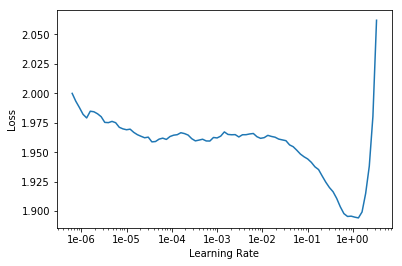

In [0]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

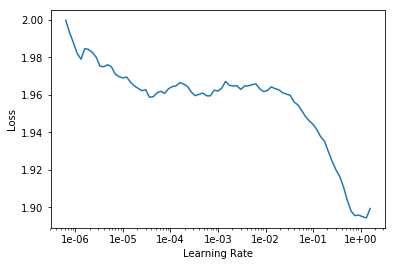

In [0]:
learn.recorder.plot(skip_end=9)

In [0]:
learn.fit_one_cycle(2, 1e-1)
learn.save('bhai_AA_lm_wiki_char_head');

epoch,train_loss,valid_loss,accuracy,time
0,1.547423,1.511355,0.565279,09:42
1,1.558667,1.486670,0.571028,09:47


In [0]:
learn.load('bhai_AA_lm_wiki_char_head')
learn.freeze_to(-2)
learn.fit_one_cycle(2, 1e-2) #1e-1 increased loss to 3
learn.save('bhai_AA_lm_wiki_char_body')

epoch,train_loss,valid_loss,accuracy,time
0,1.404606,1.387220,0.594299,10:15
1,1.393066,1.345171,0.605871,10:12


In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, 1e-3) #1e-2 increased loss to 3
learn.save('bhai_AA_lm_wiki_char_body_1')

epoch,train_loss,valid_loss,accuracy,time
0,1.344235,1.329240,0.610511,11:48
1,1.323272,1.322997,0.612248,11:47


In [0]:
learn.unfreeze()
learn.fit_one_cycle(4, 1e-3)
learn.save('bhai_AA_lm_wiki_char_body_2')

epoch,train_loss,valid_loss,accuracy,time
0,1.337430,1.321287,0.612746,12:57
1,1.299812,1.316221,0.614167,12:58
2,1.278596,1.311988,0.615420,12:58
3,1.306133,1.311509,0.615617,12:59


In [0]:
learn.save_encoder('bhai_AA_lm_wiki_char_enc')

### Classifier

In [0]:
bs = 32
data_clas=load_data(aa2,'bhai_AA_char_clas.pkl',bs=bs)

In [0]:
learn_cls = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5, pretrained=False)
learn_cls.load_encoder('bhai_AA_lm_wiki_char_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


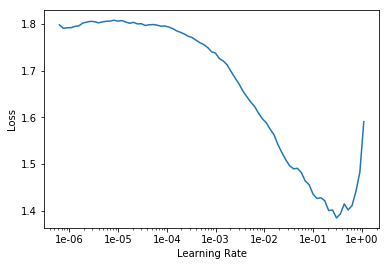

In [0]:
learn_cls.freeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(2, 1e-2, moms=(0.8,0.7))
learn_cls.save('bhai_wiki_char_cls')

epoch,train_loss,valid_loss,accuracy,time
0,1.081249,0.888001,0.750693,14:45
1,0.775110,0.450068,0.875346,12:36


In [0]:
learn_cls.freeze_to(-2)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_char_cls_2')
learn_cls.freeze_to(-3)
learn_cls.fit_one_cycle(2 , slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_char_cls_3')

epoch,train_loss,valid_loss,accuracy,time
0,0.642810,0.426107,0.872576,13:01
1,0.494929,0.342481,0.905817,13:08


epoch,train_loss,valid_loss,accuracy,time
0,0.414380,0.406928,0.864266,14:49
1,0.341998,0.285792,0.916898,14:18


In [12]:
learn_cls.load('bhai_wiki_char_cls_3')
learn_cls.unfreeze()
learn_cls.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))
learn_cls.save('bhai_wiki_char_cls_4')

epoch,train_loss,valid_loss,accuracy,time
0,0.228299,0.279681,0.908587,15:22
1,0.211142,0.273152,0.919668,14:38
2,0.202196,0.269630,0.919668,15:07
3,0.188797,0.263957,0.925208,15:19


In [13]:
pred,targ = testing(aa2/"ulm_test.csv")

300
Accuracy: 
0.9
[('rg', 'mk'), ('ij', 'hm'), ('rn', 'mk'), ('ij', 'rn'), ('fe', 'rg'), ('rg', 'mk'), ('rg', 'mk'), ('ij', 'rn'), ('rg', 'rn'), ('ij', 'hm'), ('rn', 'mk'), ('fe', 'rn'), ('rn', 'ij'), ('mk', 'hm'), ('rn', 'mk'), ('rg', 'mk'), ('rg', 'hm'), ('rg', 'rn'), ('hm', 'mk'), ('rg', 'rn'), ('fe', 'rn'), ('ij', 'rn'), ('fe', 'mk'), ('fe', 'mk'), ('fe', 'mk'), ('rn', 'rg'), ('rg', 'mk'), ('mk', 'rg'), ('rn', 'mk'), ('rg', 'rn')]


In [14]:
from sklearn.metrics import f1_score
out  = f1_score(targ, pred, average='macro')
out

0.9007625623521182